In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('E:\Level 4\Research Project\Data sets\Weather_Solar_Energy_Data.xlsx')

In [3]:
df.head()

,Date,Time,Generation_solar,Avg_Temp,Average_Pressure,Avg_Humidity,Avg_Wind_Speed,wind_deg,Average_Rainfall,Average_Snow,Average_Cloud_all,Avg_Weather_id
0,2015-01-01,10:00:00+01:00,2019.0,275.229600,1018.8,76.2,1.4,353,0.0,0.0,0.0,800.0
1,2015-01-01,11:00:00+01:00,3197.0,282.245338,1019.2,72.4,1.8,272,0.0,0.0,0.0,800.0
2,2015-01-01,12:00:00+01:00,3885.0,283.001469,1019.2,69.2,1.8,272,0.0,0.0,0.0,800.0
3,2015-01-01,13:00:00+01:00,4007.0,282.702100,1019.2,71.4,1.8,272,0.0,0.0,0.0,800.0
4,2015-01-01,14:00:00+01:00,3973.0,284.351194,1032.2,52.8,2.0,275,0.0,0.0,0.0,800.0


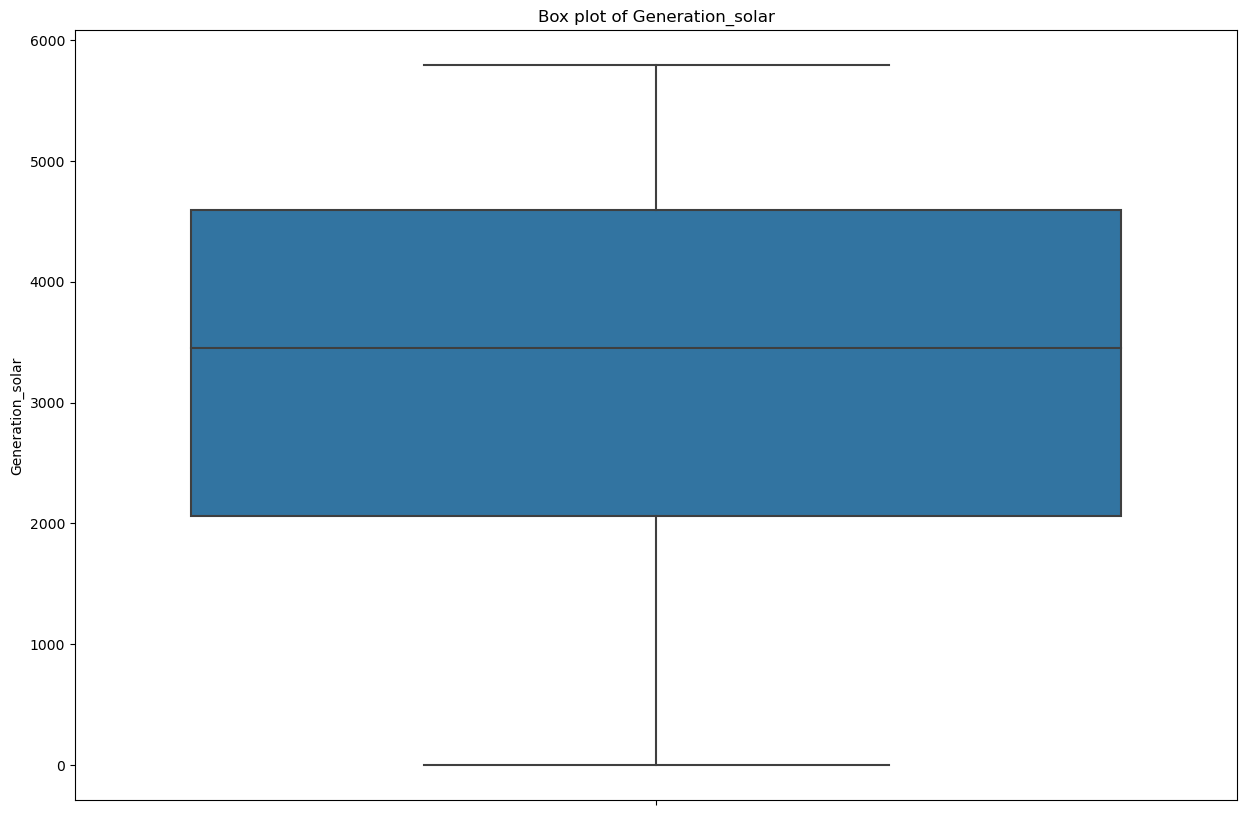

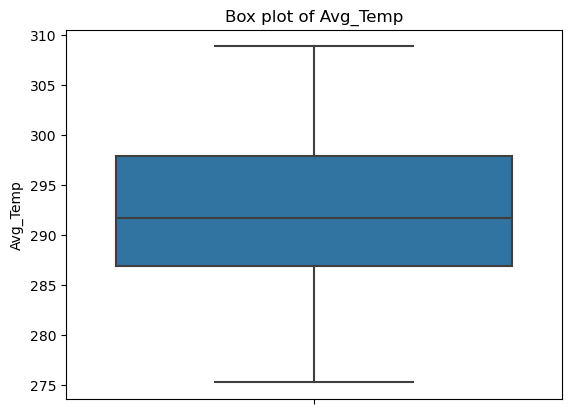

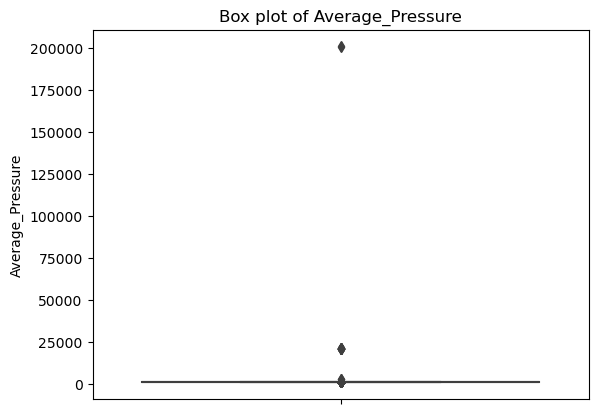

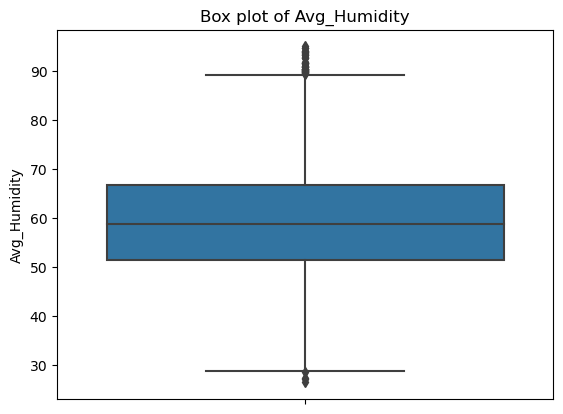

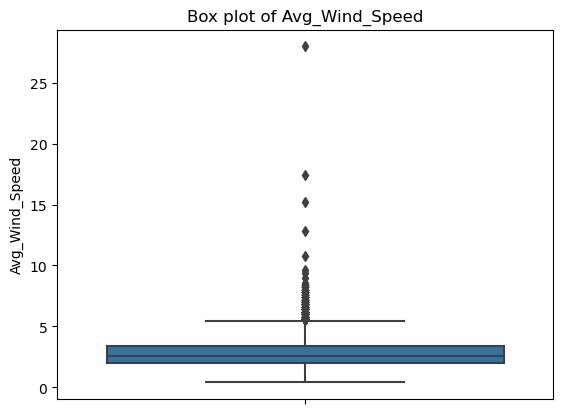

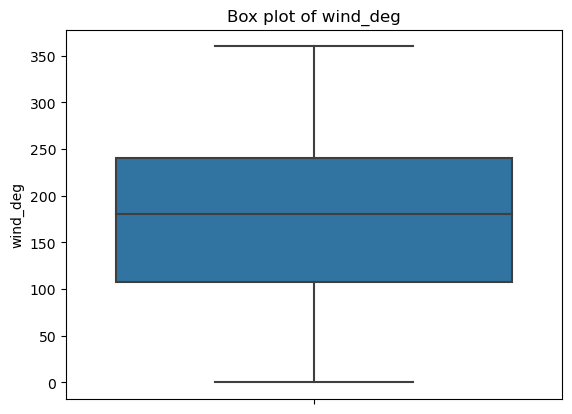

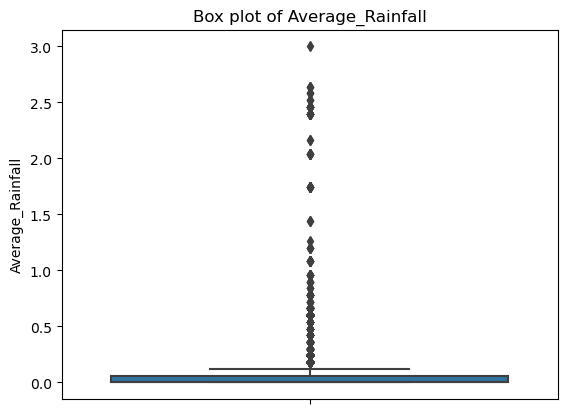

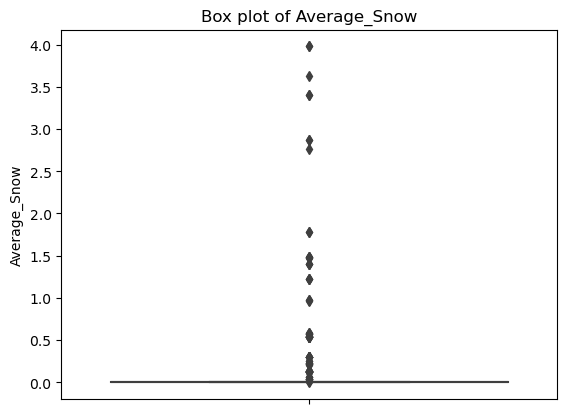

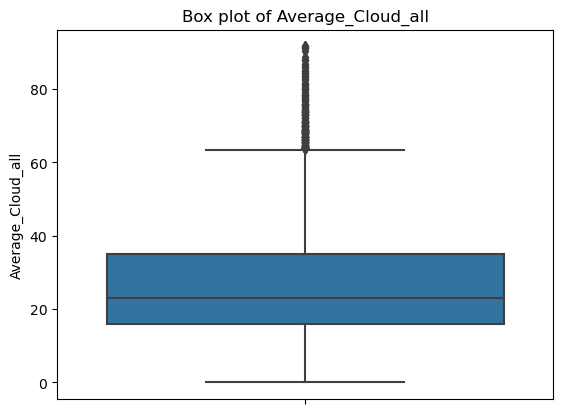

In [6]:
# Assuming your DataFrame is named df
# columns_to_plot contains the columns you want to create box plots for
columns_to_plot = ['Generation_solar', 'Avg_Temp', 'Average_Pressure', 'Avg_Humidity', 'Avg_Wind_Speed', 'wind_deg', 'Average_Rainfall', 'Average_Snow', 'Average_Cloud_all']

# Create a box plot for each column in columns_to_plot
plt.figure(figsize=(15, 10))  # Adjust the size of the figure as needed

# Loop through each column and create a box plot
for column in columns_to_plot:
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)
    plt.show()


In [7]:
df_n = pd.DataFrame(df, columns=columns_to_plot)

In [8]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Generation_solar   11680 non-null  float64
 1   Avg_Temp           11688 non-null  float64
 2   Average_Pressure   11688 non-null  float64
 3   Avg_Humidity       11688 non-null  float64
 4   Avg_Wind_Speed     11688 non-null  float64
 5   wind_deg           11688 non-null  int64  
 6   Average_Rainfall   11688 non-null  float64
 7   Average_Snow       11688 non-null  float64
 8   Average_Cloud_all  11688 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 821.9 KB


In [9]:
Q1 = df_n.quantile(0.25)
Q3 = df_n.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_counts = ((df_n < lower_bound) | (df_n > upper_bound)).sum()

print("Number of outliers using IQR method:")
print(outlier_counts)

Number of outliers using IQR method:
Generation_solar        0
Avg_Temp                0
Average_Pressure     1105
Avg_Humidity           44
Avg_Wind_Speed        399
wind_deg                0
Average_Rainfall     2073
Average_Snow           85
Average_Cloud_all     219
dtype: int64


In [10]:
Q1 = df_n['Avg_Humidity'].quantile(0.25)
Q3 = df_n['Avg_Humidity'].quantile(0.75)
IQR = Q3 - Q1
outrows = ((df_n['Avg_Humidity'] < Q1 - 1.5*IQR)|(df_n['Avg_Humidity']>Q3+1.5*IQR))
std_new = df_n.copy()
std_new = std_new[~outrows]
print('Shape before removing the outlier {}'.format(df_n.shape))
print('shape after removing the outliers {}'.format(std_new.shape))
df_n = std_new.copy()

Shape before removing the outlier (11688, 9)
shape after removing the outliers (11644, 9)


In [11]:
Q1 = df_n['Avg_Wind_Speed'].quantile(0.25)
Q3 = df_n['Avg_Wind_Speed'].quantile(0.75)
IQR = Q3 - Q1
outrows1 = ((df_n['Avg_Wind_Speed'] < Q1 - 1.5*IQR)|(df_n['Avg_Wind_Speed']>Q3+1.5*IQR))
std_new1 = df_n.copy()
std_new1 = std_new1[~outrows1]
print('Shape before removing the outlier {}'.format(df_n.shape))
print('shape after removing the outliers {}'.format(std_new1.shape))
df_n = std_new1.copy()

Shape before removing the outlier (11644, 9)
shape after removing the outliers (11246, 9)


In [12]:
Q1 = df_n['Average_Rainfall'].quantile(0.25)
Q3 = df_n['Average_Rainfall'].quantile(0.75)
IQR = Q3 - Q1
outrows2 = ((df_n['Average_Rainfall'] < Q1 - 1.5*IQR)|(df_n['Average_Rainfall']>Q3+1.5*IQR))
std_new2 = df_n.copy()
std_new2 = std_new2[~outrows2]
print('Shape before removing the outlier {}'.format(df_n.shape))
print('shape after removing the outliers {}'.format(std_new2.shape))
df_n = std_new2.copy()

Shape before removing the outlier (11246, 9)
shape after removing the outliers (9364, 9)


In [13]:
Q1 = df_n['Average_Snow'].quantile(0.25)
Q3 = df_n['Average_Snow'].quantile(0.75)
IQR = Q3 - Q1
outrows3 = ((df_n['Average_Snow'] < Q1 - 1.5*IQR)|(df_n['Average_Snow']>Q3+1.5*IQR))
std_new3 = df_n.copy()
std_new3 = std_new3[~outrows3]
print('Shape before removing the outlier {}'.format(df_n.shape))
print('shape after removing the outliers {}'.format(std_new3.shape))
df_n = std_new3.copy()

Shape before removing the outlier (9364, 9)
shape after removing the outliers (9336, 9)


In [14]:
Q1 = df_n['Average_Cloud_all'].quantile(0.25)
Q3 = df_n['Average_Cloud_all'].quantile(0.75)
IQR = Q3 - Q1
outrows4 = ((df_n['Average_Cloud_all'] < Q1 - 1.5*IQR)|(df_n['Average_Cloud_all']>Q3+1.5*IQR))
std_new4 = df_n.copy()
std_new4 = std_new4[~outrows4]
print('Shape before removing the outlier {}'.format(df_n.shape))
print('shape after removing the outliers {}'.format(std_new4.shape))
df_n = std_new4.copy()

Shape before removing the outlier (9336, 9)
shape after removing the outliers (9201, 9)


In [15]:
df_n.shape

(9201, 9)

In [32]:
from sklearn.model_selection import train_test_split

X = df_n.drop(columns=['Generation_solar'])
y = df_n['Generation_solar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Training set - X:", X_train.shape, "y:", y_train.shape)
print("Testing set - X:", X_test.shape, "y:", y_test.shape)

Training set - X: (7360, 8) y: (7360,)
Testing set - X: (1841, 8) y: (1841,)


In [34]:
# Remove missing values from training set
train_data = pd.concat([X_train, y_train], axis=1)  # Concatenate X_train and y_train
train_data = train_data.dropna(subset=['Generation_solar'])  # Remove rows with missing values in 'Generation_solar'

# Separate X and y again
X_train_cleaned = train_data.drop(columns=['Generation_solar'])
y_train_cleaned = train_data['Generation_solar']

# Remove missing values from testing set
test_data = pd.concat([X_test, y_test], axis=1)  # Concatenate X_test and y_test
test_data = test_data.dropna(subset=['Generation_solar'])  # Remove rows with missing values in 'Generation_solar'

# Separate X and y again
X_test_cleaned = test_data.drop(columns=['Generation_solar'])
y_test_cleaned = test_data['Generation_solar']

print("Cleaned Training set - X:", X_train_cleaned.shape, "y:", y_train_cleaned.shape)
print("Cleaned Testing set - X:", X_test_cleaned.shape, "y:", y_test_cleaned.shape)

Cleaned Training set - X: (7354, 8) y: (7354,)
Cleaned Testing set - X: (1839, 8) y: (1839,)


In [39]:
# Get information about the training set
print("Training Set Info:")
pd.concat([X_test_cleaned,y_test_cleaned]).describe()

# Get information about the testing set
print("\nTesting Set Info:")
pd.concat([X_train_cleaned,y_train_cleaned]).describe()

Training Set Info:

Testing Set Info:


,Avg_Temp,Average_Pressure,Avg_Humidity,Avg_Wind_Speed,wind_deg,Average_Rainfall,Average_Snow,Average_Cloud_all,0
count,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.000000,7354.0,7354.000000,7354.000000
mean,293.061839,1028.469785,57.702475,2.669840,174.458526,0.017076,0.0,22.676122,3344.577101
std,6.454325,470.501931,10.164256,0.983241,92.528051,0.031287,0.0,12.394590,1437.729901
min,276.866100,987.400000,30.600000,0.400000,0.000000,0.000000,0.0,0.000000,0.000000
25%,287.518517,1014.600000,50.200000,2.000000,110.000000,0.000000,0.0,13.600000,2185.250000
50%,292.810000,1017.400000,57.000000,2.600000,180.000000,0.000000,0.0,22.400000,3576.500000
75%,298.612050,1020.400000,65.000000,3.200000,243.000000,0.060000,0.0,31.000000,4624.750000
max,308.880000,21229.400000,88.200000,5.400000,360.000000,0.120000,0.0,56.400000,5792.000000


In [40]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train_cleaned)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

# Now X_train_scaled and X_test_scaled contain the standardized features

# Print the shapes to verify
print("Standardized Training set - X:", X_train_scaled.shape, "y:", y_train_cleaned.shape)
print("Standardized Testing set - X:", X_test_scaled.shape, "y:", y_test_cleaned.shape)

Standardized Training set - X: (7354, 8) y: (7354,)
Standardized Testing set - X: (1839, 8) y: (1839,)


In [41]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength by changing the alpha parameter

# Train the model
ridge_model.fit(X_train_scaled, y_train_cleaned)

# Predict on the training set
y_train_pred = ridge_model.predict(X_train_scaled)

# Predict on the testing set
y_test_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train_cleaned, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test_cleaned, y_test_pred, squared=False)

print("Root Mean Squared Error (RMSE) on training set:", train_rmse)
print("Root Mean Squared Error (RMSE) on testing set:", test_rmse)

Root Mean Squared Error (RMSE) on training set: 1339.0235966960067
Root Mean Squared Error (RMSE) on testing set: 1295.2501493727698


In [46]:
# Define a different range of alpha values to search
alphas = np.linspace(0.0001, 10, 100)  # Example range from 0.1 to 10 with 20 values

# Create a dictionary for the parameter grid
param_grid = {'alpha': alphas}

# Initialize Ridge regression model
ridge_model = Ridge()

# Initialize GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train_scaled, y_train_cleaned)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']

print("Best alpha:", best_alpha)

Best alpha: 10.0


In [45]:
# Initialize Ridge regression model with alpha=10
ridge_model = Ridge(alpha=10)

# Train the model
ridge_model.fit(X_train_scaled, y_train_cleaned)

# Predict on the training set
y_train_pred = ridge_model.predict(X_train_scaled)

# Predict on the testing set
y_test_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train_cleaned, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test_cleaned, y_test_pred, squared=False)

print("Root Mean Squared Error (RMSE) on training set:", train_rmse)
print("Root Mean Squared Error (RMSE) on testing set:", test_rmse)

Root Mean Squared Error (RMSE) on training set: 1339.0236917817076
Root Mean Squared Error (RMSE) on testing set: 1295.2748805479937


In [47]:
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet regression model with alpha=10
elastic_net_model = ElasticNet(alpha=10)

# Train the model
elastic_net_model.fit(X_train_scaled, y_train_cleaned)

# Predict on the training set
y_train_pred = elastic_net_model.predict(X_train_scaled)

# Predict on the testing set
y_test_pred = elastic_net_model.predict(X_test_scaled)

# Evaluate the model
train_rmse = mean_squared_error(y_train_cleaned, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test_cleaned, y_test_pred, squared=False)

print("Root Mean Squared Error (RMSE) on training set:", train_rmse)
print("Root Mean Squared Error (RMSE) on testing set:", test_rmse)

Root Mean Squared Error (RMSE) on training set: 1395.1559483436688
Root Mean Squared Error (RMSE) on testing set: 1378.4007424824276
